<a href="https://colab.research.google.com/github/calzateu/Numerical_Analysis/blob/main/code/Sentiment_analysis/Logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [3]:
data = pd.read_csv('Dataset-with-sentiments.csv')

In [4]:
sum(data['stop_comments'].isnull())

2

In [5]:
data = data[data['stop_comments'].notnull()]

In [6]:
sum(data['stop_comments'].isnull())

0

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train,X_test,y_train,y_test = train_test_split(data['stop_comments'],data['pol_cat'],test_size = 0.2,random_state = 324)

In [9]:
X_train.shape

(852,)

In [10]:
X_test.shape

(213,)

In [11]:
data['pol_cat'].value_counts()

-1    563
 1    502
Name: pol_cat, dtype: int64

## **Gonna Apply Logistic Regression**

In [13]:
from sklearn.feature_extraction.text import CountVectorizer

In [14]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer 
vect = CountVectorizer()
tf_train = vect.fit_transform(X_train)
tf_test = vect.transform(X_test)

In [15]:
tf_train

<852x2434 sparse matrix of type '<class 'numpy.int64'>'
	with 8908 stored elements in Compressed Sparse Row format>

In [16]:
tf_train.shape

(852, 2434)

**Print the Vocabulary**

In [17]:
print(vect.vocabulary_)

{'promise': 1701, 'forever': 934, 'im': 1154, 'germany': 987, 'sitting': 1949, 'table': 2109, 'und': 2253, 'cry': 628, 'girlfriend': 998, 'dont': 736, 'love': 1354, 'best': 379, 'sad': 1835, 'song': 1995, 'ever': 824, 'fact': 867, 'hello': 1085, 'iraqi': 1204, 'come': 551, 'tik': 2166, 'tok': 2176, 'music': 1475, 'beautiful': 359, 'takes': 2113, 'away': 331, 'worries': 2392, 'world': 2389, 'thank': 2139, 'always': 277, 'delena': 681, '13': 52, 'reasons': 1759, 'another': 290, 'brings': 428, 'moments': 1455, 'life': 1306, 'crying': 631, 'listen': 1315, 'realize': 1751, 'short': 1917, 'still': 2047, 'like': 1308, 'baby': 334, 'ca': 451, 'believe': 373, 'masterpiece': 1396, 'became': 362, 'famous': 880, 'years': 2416, 'tom': 2179, 've': 2297, 'saved': 1847, 'cheated': 503, 'understand': 2255, 'get': 988, 'depressed': 690, 'make': 1380, 'feel': 896, 'calm': 458, 'everytime': 830, 'thanks': 2140, 'bro': 430, 'smmm': 1968, 'cause': 486, 'many': 1389, 'different': 716, 'ways': 2342, 'interpre

In [18]:
vocab = vect.vocabulary_

In [19]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(tf_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

**Accuracy score on training dataset**

In [20]:
lr.score(tf_train,y_train)

0.9753521126760564

**Accuracy score on test dataset i.e got from the splitting**

In [21]:
lr.score(tf_test,y_test)

0.8356807511737089

**Make predictions on the test dataset i.e. unseen data to the model**

In [22]:
expected = y_test
predicted = lr.predict(tf_test)

**plot confusion matrix for the test dataset**

In [26]:
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

from sklearn import metrics

In [27]:
pip install mlxtend

[[ 77  30]
 [  5 101]]


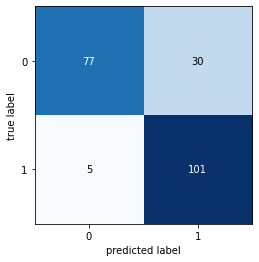

In [28]:
cf = metrics.confusion_matrix(expected,predicted,labels = [1,-1])
print(cf)
## this command is only for google collab 
## in the below figure " 1 is actually showing -1 and 0 is actually showing 1"
fig, ax = plot_confusion_matrix(conf_mat = cf)
                                
## It canbe used in any platform
# fig, ax = plot_confusion_matrix(conf_mat = cf, class_names = [1,-1])
plt.show()

In [29]:
from sklearn import metrics
print(metrics.classification_report(expected, predicted))
# print(metrics.confusion_matrix(expected,predicted))

              precision    recall  f1-score   support

          -1       0.77      0.95      0.85       106
           1       0.94      0.72      0.81       107

    accuracy                           0.84       213
   macro avg       0.86      0.84      0.83       213
weighted avg       0.86      0.84      0.83       213



**find the F1 score**

In [30]:
from sklearn.metrics import f1_score
f1_score(expected, predicted, average='macro')

0.83356774496015